In [1]:
import pyforest
import numpy as np
import pandas as pd

In [2]:
df_raw=pd.read_csv(r'D:\MTech\My_Projects\Uber\Uber_bookings.csv')

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

## Feature Description:

In [4]:
df_raw.shape

(150000, 21)

In [5]:
df_raw.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [6]:
df_raw.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [7]:
df_raw.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


## Preprocessing of Numeric Data:


In [8]:
num_data=df_raw.select_dtypes(include='float')

In [9]:
print(num_data.dtypes)

Avg VTAT                       float64
Avg CTAT                       float64
Cancelled Rides by Customer    float64
Cancelled Rides by Driver      float64
Incomplete Rides               float64
Booking Value                  float64
Ride Distance                  float64
Driver Ratings                 float64
Customer Rating                float64
dtype: object


In [10]:
num_data.isna().sum()

Avg VTAT                        10500
Avg CTAT                        48000
Cancelled Rides by Customer    139500
Cancelled Rides by Driver      123000
Incomplete Rides               141000
Booking Value                   48000
Ride Distance                   48000
Driver Ratings                  57000
Customer Rating                 57000
dtype: int64

In [11]:
num_data['Avg VTAT'] = num_data['Avg VTAT'].fillna(num_data['Avg VTAT'].mean())
num_data['Avg CTAT'] = num_data['Avg CTAT'].fillna(num_data['Avg CTAT'].mean())
num_data['Cancelled Rides by Customer'] = num_data['Cancelled Rides by Customer'].fillna(0)
num_data['Cancelled Rides by Driver'] = num_data['Cancelled Rides by Driver'].fillna(0)
num_data['Incomplete Rides'] = num_data['Incomplete Rides'].fillna(0)
num_data['Booking Value'] = num_data['Booking Value'].fillna(num_data['Booking Value'].median())
num_data['Ride Distance'] = num_data['Ride Distance'].fillna(num_data['Ride Distance'].median())
num_data['Driver Ratings'] = num_data['Driver Ratings'].fillna(num_data['Driver Ratings'].median())
num_data['Customer Rating'] = num_data['Customer Rating'].fillna(num_data['Customer Rating'].median())


In [12]:
num_data.isna().sum()

Avg VTAT                       0
Avg CTAT                       0
Cancelled Rides by Customer    0
Cancelled Rides by Driver      0
Incomplete Rides               0
Booking Value                  0
Ride Distance                  0
Driver Ratings                 0
Customer Rating                0
dtype: int64

In [13]:
print(num_data.dtypes)

Avg VTAT                       float64
Avg CTAT                       float64
Cancelled Rides by Customer    float64
Cancelled Rides by Driver      float64
Incomplete Rides               float64
Booking Value                  float64
Ride Distance                  float64
Driver Ratings                 float64
Customer Rating                float64
dtype: object


In [14]:
num_data

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
0,8.456352,29.149636,0.0,0.0,0.0,414.0,23.72,4.3,4.5
1,4.900000,14.000000,0.0,0.0,1.0,237.0,5.73,4.3,4.5
2,13.400000,25.800000,0.0,0.0,0.0,627.0,13.58,4.9,4.9
3,13.100000,28.500000,0.0,0.0,0.0,416.0,34.02,4.6,5.0
4,5.300000,19.600000,0.0,0.0,0.0,737.0,48.21,4.1,4.3
...,...,...,...,...,...,...,...,...,...
149995,10.200000,44.400000,0.0,0.0,0.0,475.0,40.08,3.7,4.1
149996,5.100000,30.800000,0.0,0.0,0.0,1093.0,21.31,4.8,5.0
149997,2.700000,23.400000,0.0,0.0,0.0,852.0,15.93,3.9,4.4
149998,6.900000,39.600000,0.0,0.0,0.0,333.0,45.54,4.1,3.7


In [15]:
object_data=df_raw.select_dtypes(include='object')

In [16]:
object_data.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Reason for cancelling by Customer    139500
Driver Cancellation Reason           123000
Incomplete Rides Reason              141000
Payment Method                        48000
dtype: int64

In [17]:
reason_cols = [
    "Reason for cancelling by Customer",
    "Driver Cancellation Reason",
    "Incomplete Rides Reason"
]

# Fill nulls
object_data[reason_cols] = object_data[reason_cols].fillna("Not cancelled")
object_data['Payment Method'] = object_data['Payment Method'].fillna("mode")

In [18]:
object_data.isna().sum()

Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Reason for cancelling by Customer    0
Driver Cancellation Reason           0
Incomplete Rides Reason              0
Payment Method                       0
dtype: int64

In [19]:
object_data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,Not cancelled,Not cancelled,Not cancelled,mode
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,Not cancelled,Not cancelled,Vehicle Breakdown,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,Not cancelled,Not cancelled,Not cancelled,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,Not cancelled,Not cancelled,Not cancelled,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,Not cancelled,Not cancelled,Not cancelled,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,Not cancelled,Not cancelled,Not cancelled,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,Not cancelled,Not cancelled,Not cancelled,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,Not cancelled,Not cancelled,Not cancelled,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,Not cancelled,Not cancelled,Not cancelled,UPI


In [20]:
df1=pd.concat([num_data,object_data],axis=1)

In [21]:
df1

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Date,...,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
0,8.456352,29.149636,0.0,0.0,0.0,414.0,23.72,4.3,4.5,2024-03-23,...,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,Not cancelled,Not cancelled,Not cancelled,mode
1,4.900000,14.000000,0.0,0.0,1.0,237.0,5.73,4.3,4.5,2024-11-29,...,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,Not cancelled,Not cancelled,Vehicle Breakdown,UPI
2,13.400000,25.800000,0.0,0.0,0.0,627.0,13.58,4.9,4.9,2024-08-23,...,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,Not cancelled,Not cancelled,Not cancelled,Debit Card
3,13.100000,28.500000,0.0,0.0,0.0,416.0,34.02,4.6,5.0,2024-10-21,...,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,Not cancelled,Not cancelled,Not cancelled,UPI
4,5.300000,19.600000,0.0,0.0,0.0,737.0,48.21,4.1,4.3,2024-09-16,...,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,Not cancelled,Not cancelled,Not cancelled,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,10.200000,44.400000,0.0,0.0,0.0,475.0,40.08,3.7,4.1,2024-11-11,...,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,Not cancelled,Not cancelled,Not cancelled,Uber Wallet
149996,5.100000,30.800000,0.0,0.0,0.0,1093.0,21.31,4.8,5.0,2024-11-24,...,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,Not cancelled,Not cancelled,Not cancelled,UPI
149997,2.700000,23.400000,0.0,0.0,0.0,852.0,15.93,3.9,4.4,2024-09-18,...,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,Not cancelled,Not cancelled,Not cancelled,Cash
149998,6.900000,39.600000,0.0,0.0,0.0,333.0,45.54,4.1,3.7,2024-10-05,...,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,Not cancelled,Not cancelled,Not cancelled,UPI


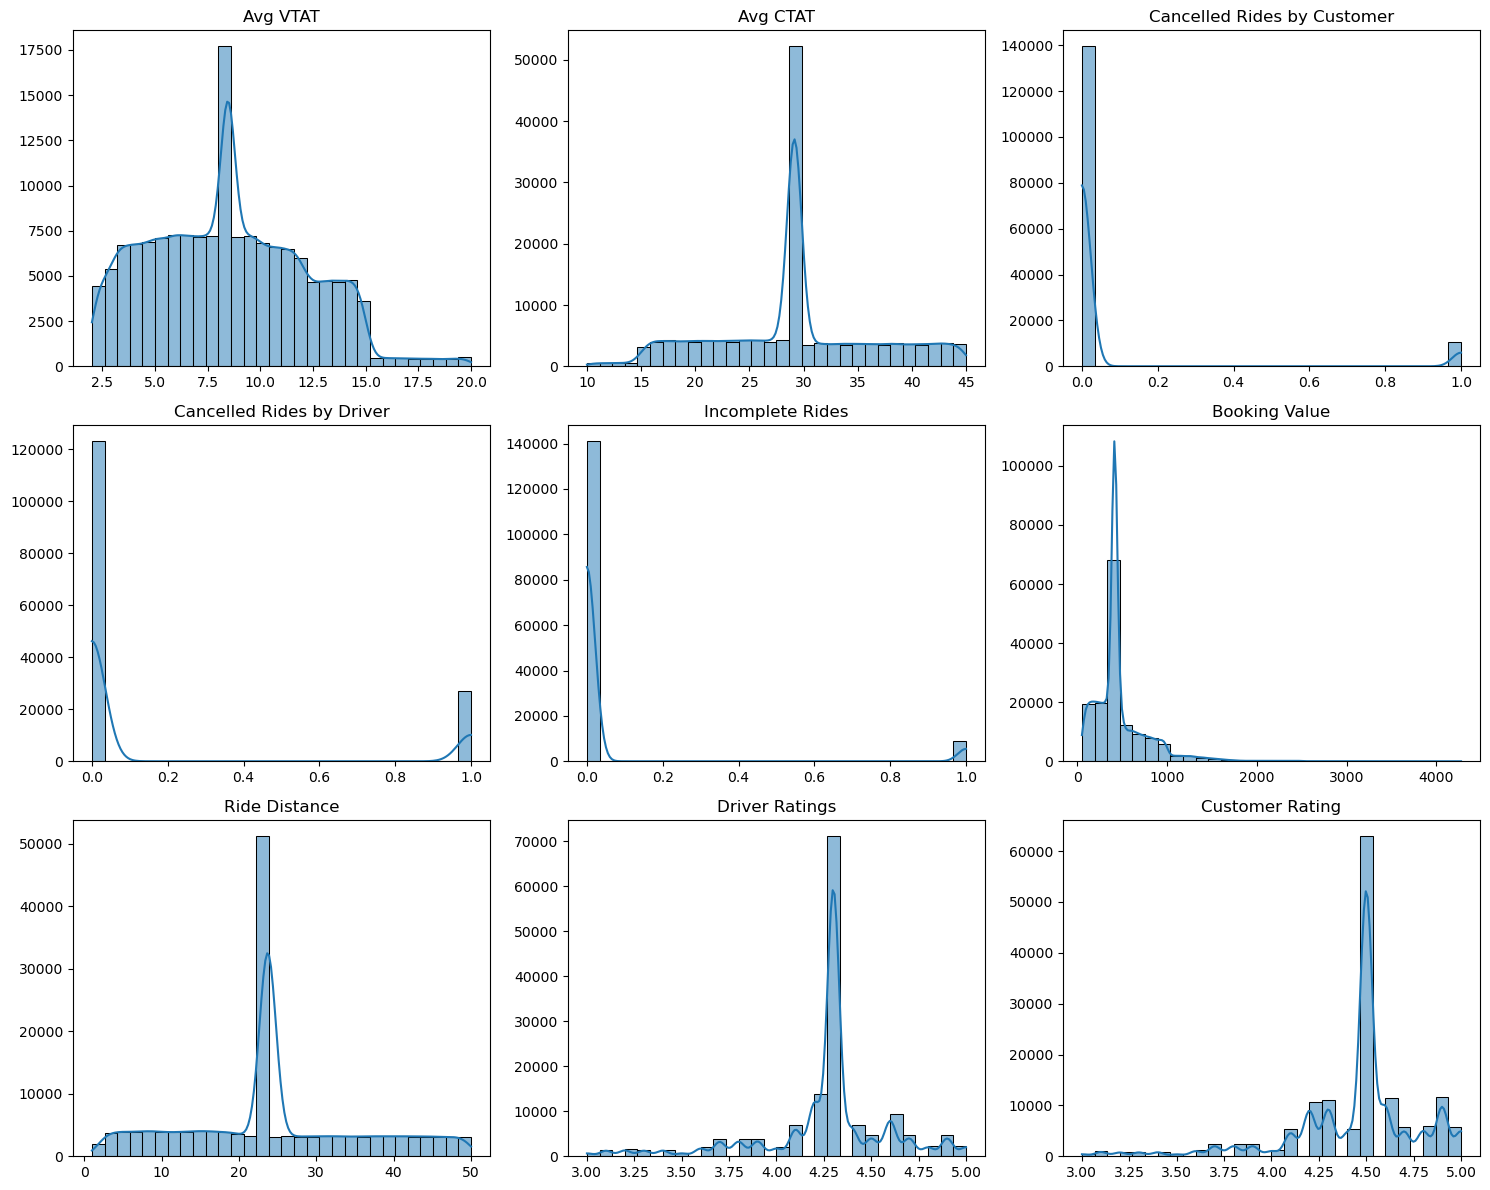

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# number of columns in your data
n_cols = len(num_data.columns)

# decide subplot grid size
n_rows = math.ceil(n_cols / 3)   # 3 plots per row (you can change)

plt.figure(figsize=(15, 4*n_rows))

for i, col in enumerate(num_data.columns, 1):
    plt.subplot(n_rows, 3, i)   # n_rows x 3 grid
    sns.histplot(num_data[col], kde=True, bins=30)
    plt.title(f"{col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


## Customer Ride Cancellation Analysis

In [23]:
df1['Cancelled Rides by Customer'].value_counts()

Cancelled Rides by Customer
0.0    139500
1.0     10500
Name: count, dtype: int64

In [24]:
def cancelled_status(x):
    if x==0:
        return "Not Cancelled"
    if x==1:
        return "Cancelled"
    else:
        return "unknown"

df1['Cancelled_status']=df1['Cancelled Rides by Customer'].apply(cancelled_status)

In [25]:
df1['Cancelled_status'].value_counts()

Cancelled_status
Not Cancelled    139500
Cancelled         10500
Name: count, dtype: int64

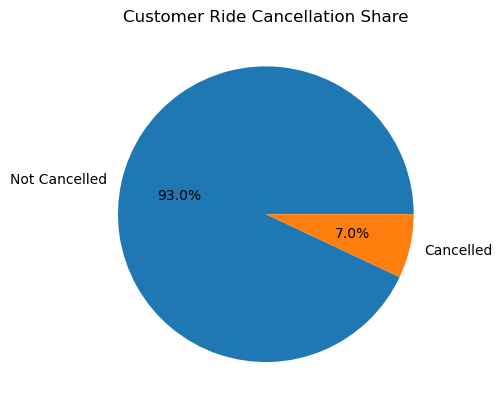

In [26]:
df1['Cancelled_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Customer Ride Cancellation Share")
plt.ylabel("")
plt.show()

## Vehicle Category Share

In [27]:
df1['Vehicle Type'].value_counts()

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

In [28]:
df1['Vehicle Type'].value_counts()

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\975052529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


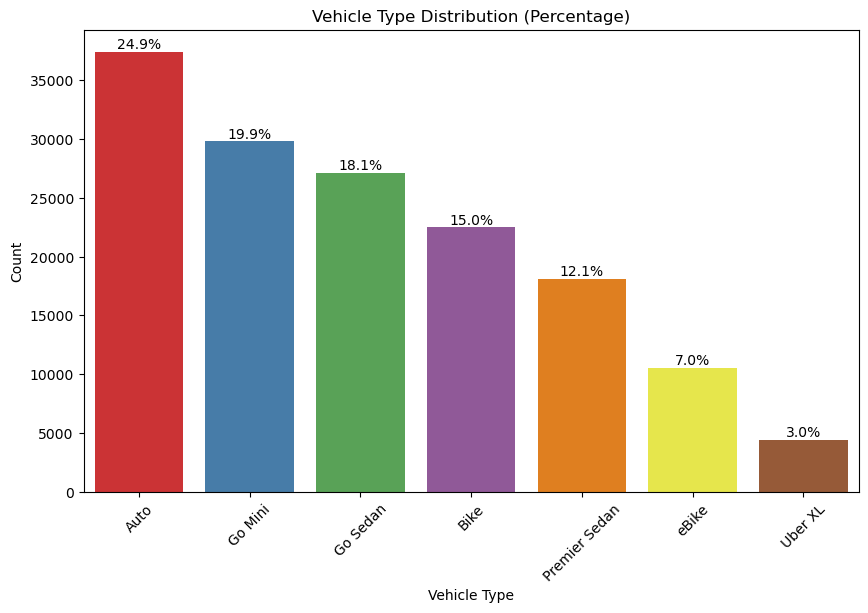

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df1,
    x="Vehicle Type",
    order=df1['Vehicle Type'].value_counts().index,
    palette="Set1"
)

# Calculate percentages and annotate
total = len(df1)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Vehicle Type Distribution (Percentage)")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Ride Distance Impact on Booking Value

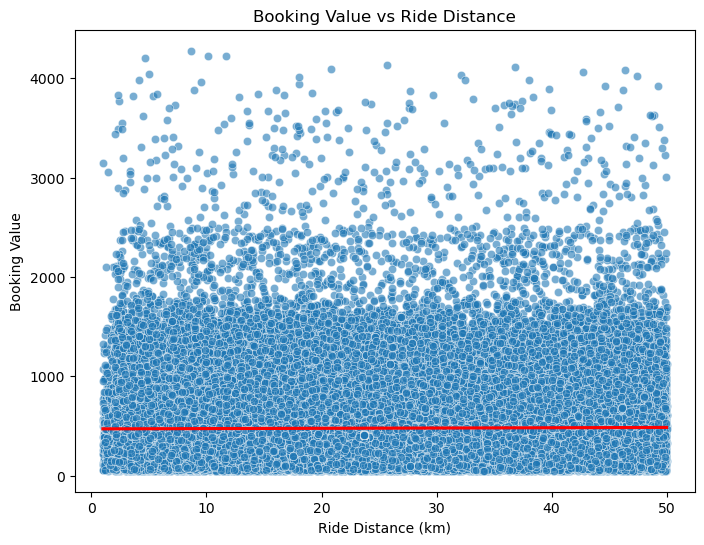

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df1, x="Ride Distance", y="Booking Value", alpha=0.6)

# Optional: Add trend line
sns.regplot(data=df1, x="Ride Distance", y="Booking Value", scatter=False, color="red")

plt.title("Booking Value vs Ride Distance")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Booking Value")
plt.show()

In [31]:
df1['Payment Method'].value_counts()

Payment Method
mode           48000
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\203440116.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


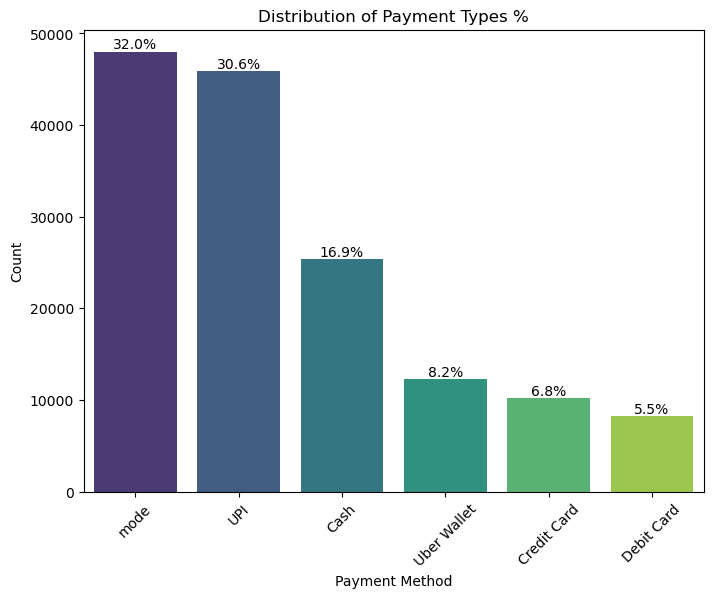

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=df1,
    x="Payment Method",
    order=df1['Payment Method'].value_counts().index,
    palette="viridis"
)

total = len(df1)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Distribution of Payment Types %")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [33]:
df1['Reason for cancelling by Customer'].value_counts()

Reason for cancelling by Customer
Not cancelled                                   139500
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
AC is not working                                 1155
Name: count, dtype: int64

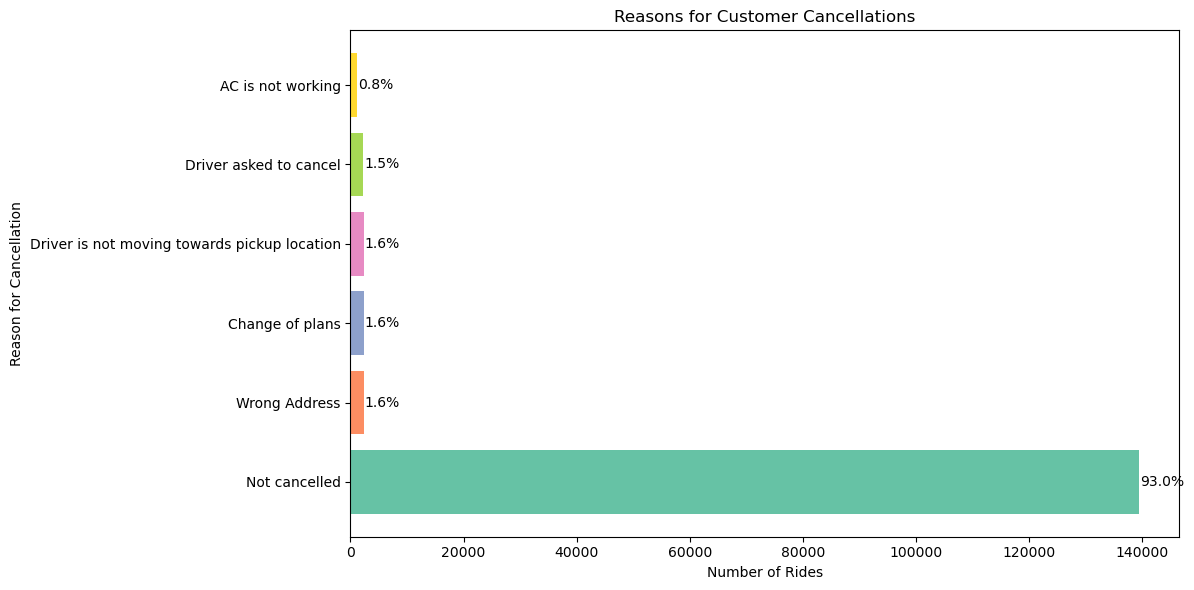

In [34]:
import matplotlib.pyplot as plt

# Get counts
counts = df1['Reason for cancelling by Customer'].value_counts()
total = counts.sum()

colors = plt.cm.Set2.colors  # soft pastel colors

# Create figure and axis
ig, ax = plt.subplots(figsize=(12,6))
bars = ax.barh(counts.index, counts.values, color=colors[:len(counts)])

# Labels and title
ax.set_xlabel("Number of Rides")
ax.set_ylabel("Reason for Cancellation")
ax.set_title("Reasons for Customer Cancellations")



# Annotate percentages on bars
for bar in bars:
    width = bar.get_width()
    percentage = f'{100 * width / total:.1f}%'
    ax.text(width + 200,                # small offset to the right of the bar
            bar.get_y() + bar.get_height()/2,
            percentage,
            ha='left', va='center')

plt.tight_layout()
plt.show()


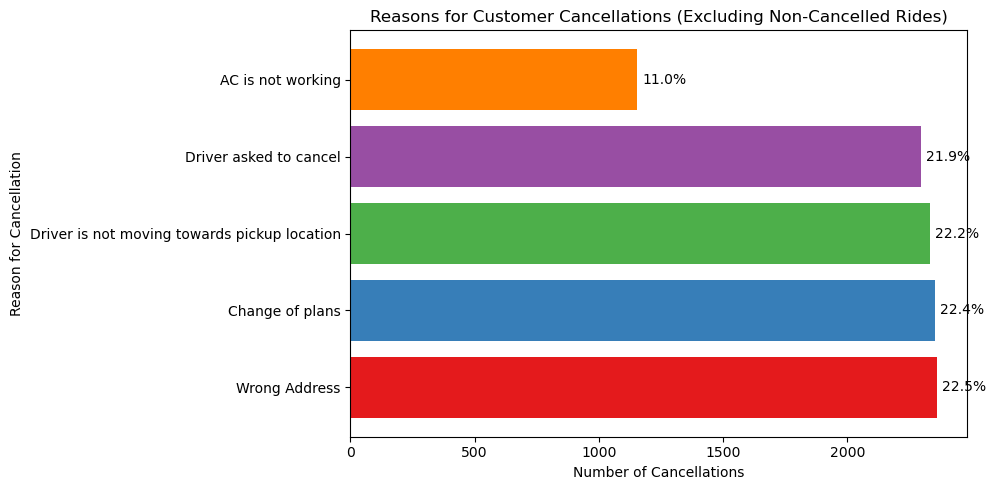

In [35]:
import matplotlib.pyplot as plt

# Exclude "Not Provided"
filtered_counts = df1['Reason for cancelling by Customer'].value_counts()
filtered_counts = filtered_counts[filtered_counts.index != "Not cancelled"]

# Recalculate total for percentages
total = filtered_counts.sum()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(filtered_counts.index, filtered_counts.values, color=plt.cm.Set1.colors)

# Labels and title
ax.set_xlabel("Number of Cancellations")
ax.set_ylabel("Reason for Cancellation")
ax.set_title("Reasons for Customer Cancellations (Excluding Non-Cancelled Rides)")

# Annotate percentages on bars
for bar in bars:
    width = bar.get_width()
    percentage = f'{100 * width / total:.1f}%'
    ax.text(width + 20,  # offset
            bar.get_y() + bar.get_height()/2,
            percentage,
            ha='left', va='center')

plt.tight_layout()
plt.show()

## Booking Status Analysis

In [36]:
df1['Booking Status'].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

<Axes: ylabel='count'>

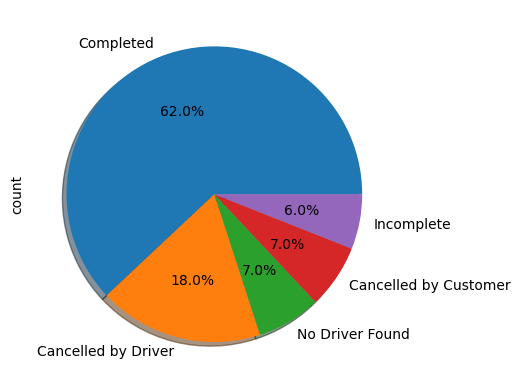

In [37]:
df1['Booking Status'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True)

## Comparison of Driver and Customer Ratings Across Vehicle Types

In [38]:
rating_summary = df1.groupby('Vehicle Type')[['Driver Ratings','Customer Rating']].agg(['mean','min','max'])
print(rating_summary)


              Driver Ratings           Customer Rating          
                        mean  min  max            mean  min  max
Vehicle Type                                                    
Auto                4.258150  3.0  5.0        4.439357  3.0  5.0
Bike                4.256406  3.0  5.0        4.440130  3.0  5.0
Go Mini             4.255002  3.0  5.0        4.440442  3.0  5.0
Go Sedan            4.258104  3.0  5.0        4.444700  3.0  5.0
Premier Sedan       4.259533  3.0  5.0        4.440020  3.0  5.0
Uber XL             4.261430  3.0  5.0        4.440481  3.0  5.0
eBike               4.253841  3.0  5.0        4.440400  3.0  5.0


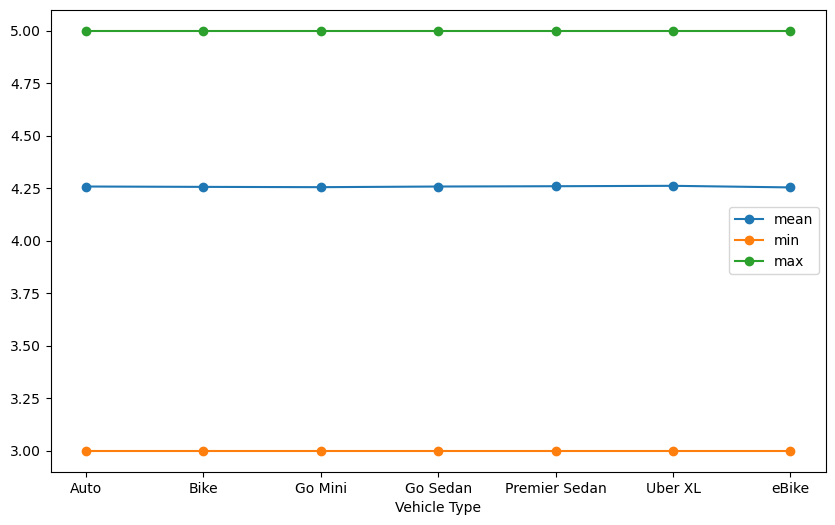

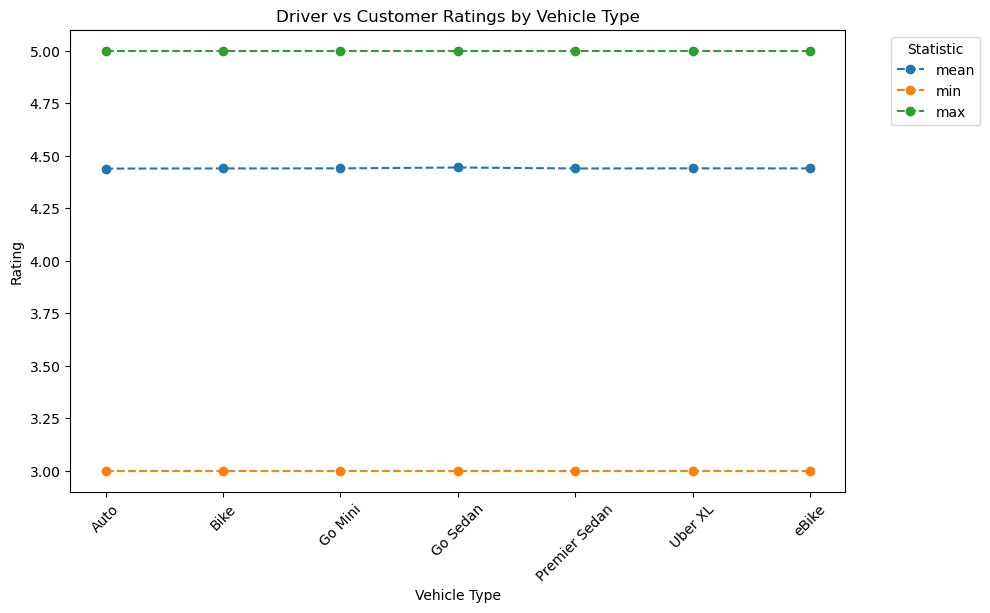

In [39]:
rating_summary = df1.groupby('Vehicle Type')[['Driver Ratings','Customer Rating']].agg(['mean','min','max'])


rating_summary.xs('Driver Ratings', axis=1, level=0).plot(marker='o', figsize=(10,6))
rating_summary.xs('Customer Rating', axis=1, level=0).plot(marker='o', figsize=(10,6), linestyle='--')
plt.title("Driver vs Customer Ratings by Vehicle Type")

plt.ylabel("Rating")
plt.xlabel("Vehicle Type")
plt.xticks(rotation=45)
plt.legend(title="Statistic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Hourly Booking Value Analysis

In [40]:
df1[['Time','Booking Value']]

,Time,Booking Value
0,12:29:38,414.0
1,18:01:39,237.0
2,08:56:10,627.0
3,17:17:25,416.0
4,22:08:00,737.0
...,...,...
149995,19:34:01,475.0
149996,15:55:09,1093.0
149997,10:55:15,852.0
149998,07:53:34,333.0


In [41]:
# Convert Time column to datetime if not already
df1['Time'] = pd.to_datetime(df1['Time'])

# Group by hour
hourly_bookings = df1.groupby(df1['Time'].dt.hour)['Booking Value'].sum()

# Find hour with max value
peak_hour = hourly_bookings.idxmax()
peak_value = hourly_bookings.max()

print(f"Peak booking value occurs at {peak_hour}:00 with total value {peak_value}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\3094579968.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Time'] = pd.to_datetime(df1['Time'])


Peak booking value occurs at 18:00 with total value 5939397.0


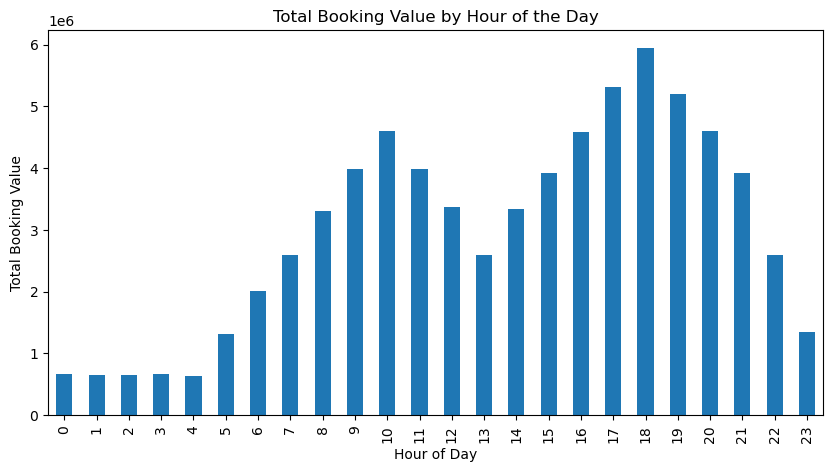

In [42]:
import matplotlib.pyplot as plt

hourly_bookings.plot(kind='bar', figsize=(10,5))
plt.title("Total Booking Value by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Booking Value")
plt.show()


## Is there a significant difference in the number of rides completed vs. cancelled by drivers or customers?

In [43]:
customer_status=df1['Cancelled Rides by Customer'].value_counts()
driver_status=df1['Cancelled Rides by Driver'].value_counts()

In [44]:
# Combine them into one observed array
observed = pd.concat([customer_status, driver_status]).values
observed

array([139500,  10500, 123000,  27000], dtype=int64)

In [45]:
# Expected frequencies (equal distribution assumption)
expected=[sum(observed)/len(observed)]*len(observed)
expected

[75000.0, 75000.0, 75000.0, 75000.0]

In [46]:
from scipy.stats import chisquare
# Chi-Square Goodness of Fit
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
print(p_val)

0.0


## Does the reason for cancellation depend on whether the ride was cancelled by the customer or driver?

In [47]:
# Keep only cancelled rides
cancelled_df = df1[df1['Booking Status'].isin(['Cancelled by Customer', 'Cancelled by Driver'])].copy()

# Create unified reason column
cancelled_df['Cancellation Reason'] = cancelled_df.apply(
    lambda row: row['Reason for cancelling by Customer'] if row['Booking Status']=='Cancelled by Customer' 
    else row['Driver Cancellation Reason'], axis=1
)

# Map "Cancelled By" column
cancelled_df['Cancelled_By'] = cancelled_df['Booking Status'].map({
    'Cancelled by Customer': 'Customer',
    'Cancelled by Driver': 'Driver'
})

In [48]:
contingency_table = pd.crosstab(cancelled_df['Cancelled_By'], cancelled_df['Cancellation Reason'])


In [49]:
# Run Chi-Square Test of Independence
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# Conclusion
alpha = 0.05
if p < alpha:
    print("Reject H0: Cancellation reason depends on who cancelled.")
else:
    print("Fail to reject H0: Cancellation reason is independent of who cancelled.")


Chi-Square Statistic: 37500.0
Degrees of Freedom: 8
p-value: 0.0
Reject H0: Cancellation reason depends on who cancelled.


## Do Driver Ratings differ across Vehicle Types?


In [50]:
df1.columns

Index(['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Date', 'Time',
       'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type',
       'Pickup Location', 'Drop Location', 'Reason for cancelling by Customer',
       'Driver Cancellation Reason', 'Incomplete Rides Reason',
       'Payment Method', 'Cancelled_status'],
      dtype='object')

In [51]:
df1.groupby('Vehicle Type')['Driver Ratings'].count()

Vehicle Type
Auto             37419
Bike             22517
Go Mini          29806
Go Sedan         27141
Premier Sedan    18111
Uber XL           4449
eBike            10557
Name: Driver Ratings, dtype: int64

In [52]:
groups = [group["Driver Ratings"].values for name, group in df1.groupby("Vehicle Type")]

In [53]:
from scipy.stats import f_oneway  
f_statistics,p_value=stats.f_oneway(*groups)
print(p_value)

<IPython.core.display.Javascript object>

0.6388137727018233


## Do Customer Ratings differ across Vehicle Types?

In [54]:
df1.groupby('Vehicle Type')['Customer Rating'].count()

Vehicle Type
Auto             37419
Bike             22517
Go Mini          29806
Go Sedan         27141
Premier Sedan    18111
Uber XL           4449
eBike            10557
Name: Customer Rating, dtype: int64

In [55]:
groups=[group['Customer Rating'].values for name,group in df1.groupby('Vehicle Type')]

In [56]:
stats,p_value=f_oneway(*groups)
print(p_value)

0.6391576683160441


## Is there a correlation between Driver Ratings and Customer Ratings?

In [57]:
from scipy.stats import pearsonr

cus_rating=df1['Customer Rating']
driver_rating=df1['Driver Ratings']
corr_coff,p_value=pearsonr(cus_rating,driver_rating)
print(p_value)

3.991324626946921e-06
